In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from ipywidgets import Layout, interact, IntSlider
%matplotlib widget

In [2]:
max_val = 100 #s
num_val = int(1e6)

In [69]:
f1 = 440*(2)**(np.random.randint(-50,50)/12)#7 # Hz
alpha1 = 0.4 # s-1
f2 = f1 * (2)**(np.random.randint(-10,10)/12) #(np.random.rand()*10) # Hz
alpha2 = 0.1 # s-1
f3 = f1 * (2)**(np.random.randint(-10,10)/12) #(np.random.rand()*10) # Hz
alpha3 = 0.15
COS = np.random.rand()
max_val = 10/(f2-f1)
t = np.log(np.logspace(0,max_val,num_val))

In [70]:
phase1 = np.random.rand()*2*np.pi
F1 = lambda x: np.exp(-alpha1*x)*np.cos(2*np.pi*f1*t)
F2 = lambda x: np.exp(-alpha2*x)*np.cos(2*np.pi*f2*t)
F3 = lambda x: np.exp(-alpha3*x)*np.cos(2*np.pi*f3*t)

(-2.3764026462805283,
 2.1901671116038504,
 -0.47772035633319654,
 0.4957580119747004)

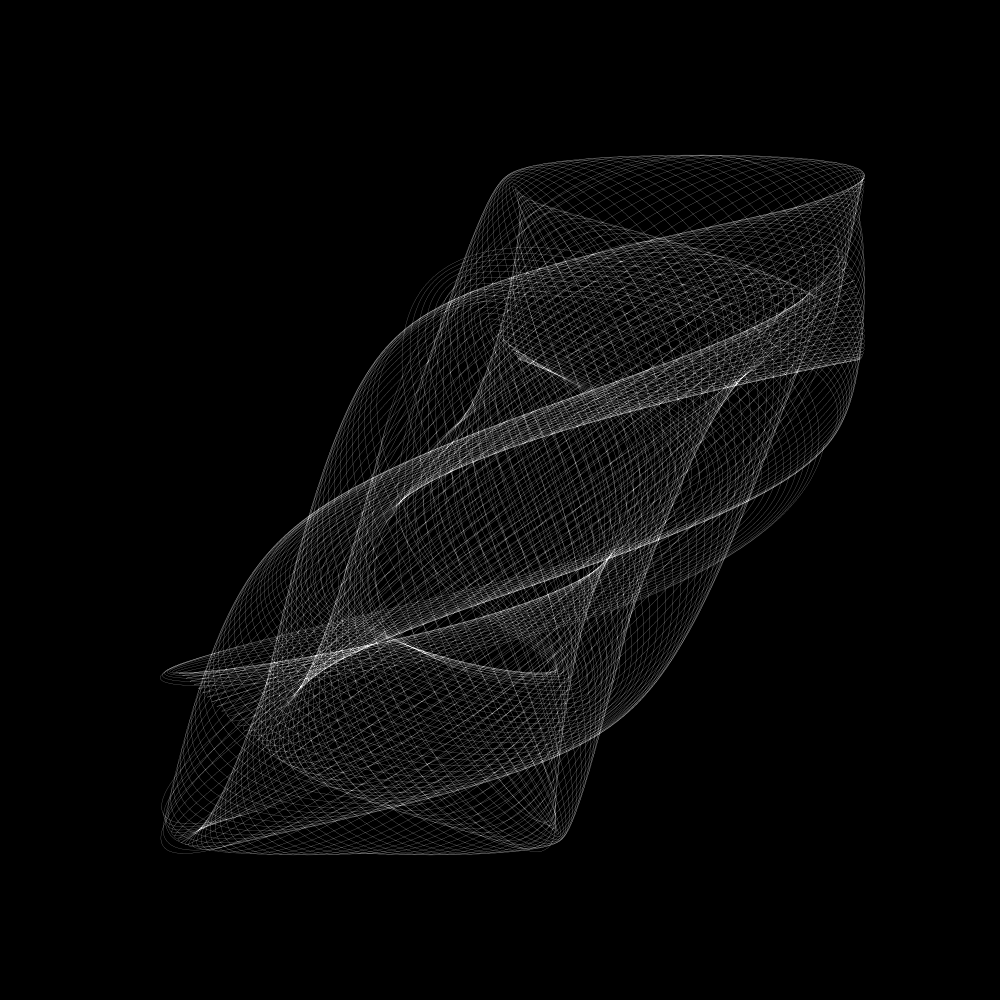

In [71]:
fig= plt.figure(figsize = (10,10))
X = F1(t) + F3(t)*COS
Y = F2(t)*np.cos(phase1) + F3(t)*(1-COS**2)**(1/2)
plt.plot(X,Y,'w',linewidth = 0.15,linestyle='dashed')

#plt.plot(F1(t)-F2(t)*np.cos(phase1),F2(t)*np.sin(phase1)+F1(t),'w',linewidth = 0.15,linestyle='dashed')
ax = plt.gca()
fig.patch.set_facecolor('k')
ax.axis('off')

In [130]:
max_val

-0.1653385552428609

In [72]:
print(f1,f2,f3)

554.3652619537442 493.88330125612407 369.9944227116344


In [8]:
(np.max((f2,f1))/np.min((f1,f2)))

2.378414230005442

In [157]:
(2)**(1/12)

1.0594630943592953

# Now use equal temperament notes

In [5]:
notes = ['A', 'A#','B','C','C#','D','D#','E','F','F#','G','G#']
values = [2**(i/12) for i in range(len(notes))]
note_val = dict(zip(notes,values))
octaves = np.arange(1,10,1)
octave_value = 2**(octaves.astype(float)-4)*440
octave_vals = dict(zip(octaves,octave_value))

full_keyboard = []
for i in octaves:
    full_keyboard+=([n+str(i) for n in notes])

In [6]:
def get_frequency(note,octave):
    base_freq = note_val[note]
    return octave_vals[octave] * base_freq

random_note = lambda :notes[np.random.randint(0,len(notes))]
random_octave = lambda :octaves[np.random.randint(0,len(octaves))]

In [7]:
max_T = 0.2 #s
num_dt = int(1e5)
alpha1 = 1/1.5 # s-1
alpha2 = 1/2 # s-1
alpha3 = 1/2 # s-1
COS = np.random.rand()
#max_val = 10/(f2-f1)

phase1 = np.random.rand()*2*np.pi

In [204]:
Notes = [(random_note(),random_octave()) for _ in range(3)]
[f1,f2,f3] = [get_frequency(*Notes[i]) for i in range(3)]
print(f'{Notes[0][0][0]}{Notes[0][1]} - {Notes[1][0][0]}{Notes[1][1]} - {Notes[2][0][0]}{Notes[2][1]} ')

E3 - E1 - B2 


In [232]:
max_T = 100/(f2-f1)
t = np.log(np.logspace(0,max_T,num_dt))
F1 = lambda x: np.exp(-2*alpha1*x)*np.cos(2*np.pi*f1*t)
F2 = lambda x: np.exp(-2*alpha2*x)*np.cos(2*np.pi*f2*t)
F3 = lambda x: np.exp(-2*alpha3*x)*np.cos(2*np.pi*f3*t)

Text(0.5, 0.98, 'E3 - E1 - B2 ')

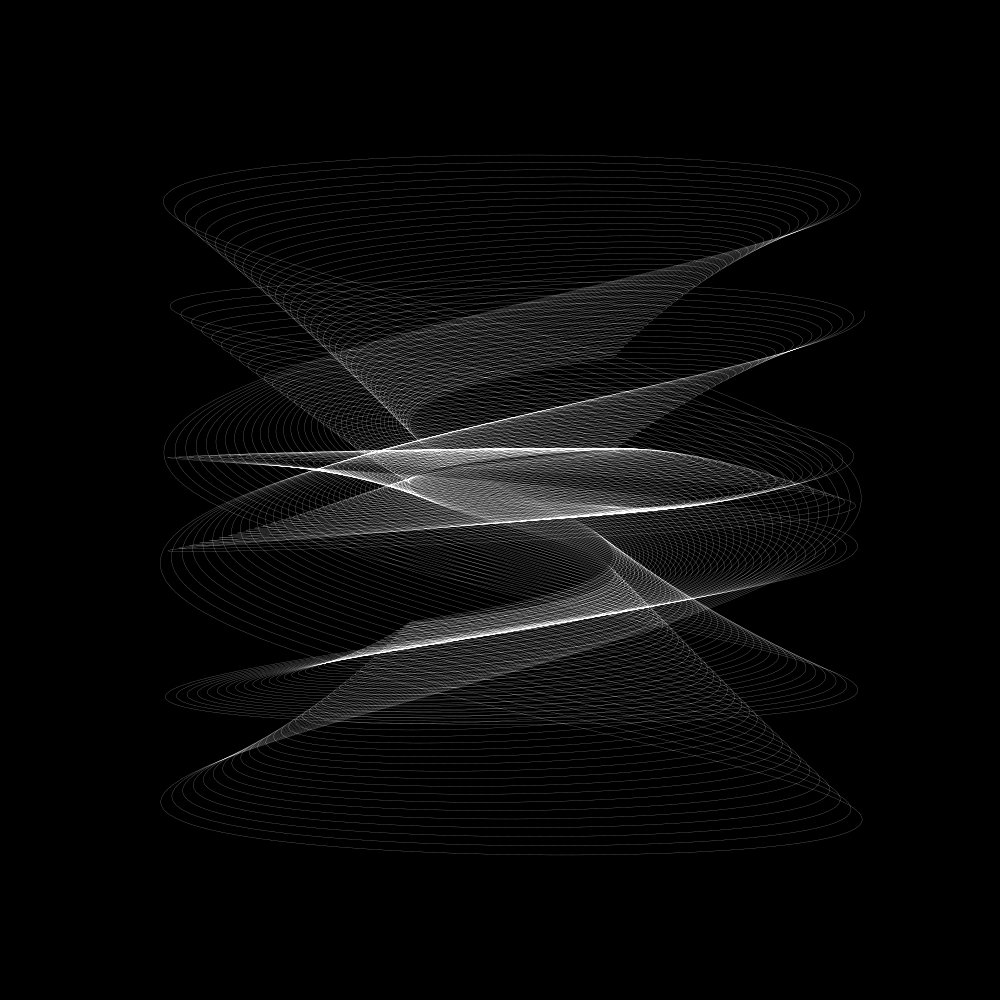

In [233]:
fig= plt.figure(figsize = (10,10))
X = F1(t) + F3(t)*COS
Y = F2(t)*np.cos(phase1) + F3(t)*(1-COS**2)**(1/2)
plt.plot(X,Y,'w',linewidth = 0.15,linestyle='dashed')

#plt.plot(F1(t)-F2(t)*np.cos(phase1),F2(t)*np.sin(phase1)+F1(t),'w',linewidth = 0.15,linestyle='dashed')
ax = plt.gca()
fig.patch.set_facecolor('k')
ax.axis('off')
fig.suptitle(f'{Notes[0][0][0]}{Notes[0][1]} - {Notes[1][0][0]}{Notes[1][1]} - {Notes[2][0][0]}{Notes[2][1]} ')

In [9]:
freq1 = widgets.SelectionSlider(
    options=full_keyboard,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    description='f1',
    layout=Layout(width='500px')
)
freq2 = widgets.SelectionSlider(
    options=full_keyboard,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    description='f2',
    layout=Layout(width='500px')
)
freq3 = widgets.SelectionSlider(
    options=full_keyboard,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    description='f3',
    layout=Layout(width='500px')
)
def f(freq1, freq2, freq3):
    f1 = get_frequency(freq1[:-1],int(freq1[-1]))
    f2 = get_frequency(freq2[:-1],int(freq2[-1]))
    f3 = get_frequency(freq3[:-1],int(freq3[-1]))
    max_T = 100/(f2-f1)
    COS = np.random.rand()
    t = np.log(np.logspace(0,max_T,num_dt))
    F1 = lambda x: np.exp(-2*alpha1*x)*np.cos(2*np.pi*f1*t)
    F2 = lambda x: np.exp(-2*alpha2*x)*np.cos(2*np.pi*f2*t)
    F3 = lambda x: np.exp(-2*alpha3*x)*np.cos(2*np.pi*f3*t)
    print('{}*{}*{}'.format(f1, f2, f3))
    fig= plt.figure(figsize = (10,10))
    X = F1(t) + F3(t)*COS
    Y = F2(t)*np.cos(phase1) + F3(t)*(1-COS**2)**(1/2)
    plt.plot(X,Y,'w',linewidth = 0.15,linestyle='dashed')

    #plt.plot(F1(t)-F2(t)*np.cos(phase1),F2(t)*np.sin(phase1)+F1(t),'w',linewidth = 0.15,linestyle='dashed')
    ax = plt.gca()
    fig.patch.set_facecolor('k')
    ax.axis('off')
    plt.show()
    #fig.suptitle(f'{Notes[0][0][0]}{Notes[0][1]} - {Notes[1][0][0]}{Notes[1][1]} - {Notes[2][0][0]}{Notes[2][1]} ')

out = widgets.interactive_output(f, {'freq1': freq1, 'freq2': freq2, 'freq3': freq3})

widgets.VBox([widgets.VBox([freq1, freq2, freq3]), out])